
The code will first ask for the location of your text files. 
I'm on a mac so I right clicked a text file and copied the path
and pasted it into the dialogue.

The code will then ask for the location of your image files. 
Same thing only with an image file.

NOTE: if you enter a wrong directory, in lines 29 and 30 below change 
txt_dir = text_files_location()
images_path = images_location()
to
txt_dir = text_files_location(force_reload=True)
images_path = images_location(force_reload=True)

I'll be polishing this as we go, but it will give you a useful dataframe.

**At the bottom of this notebook is sample code for filtering to a specific group and level.**

Save the dataframe to a file and you will not need to rerun this code. The last cell is code I used to save it, change the path for your needs. I saved it to the same path as the txt files.


**This is the url to obtain each image from supabase:** Change the #######.jpg to the number of the image to access different images.

https://cxacyhoghhzisqxuwspe.supabase.co/storage/v1/object/public/aircraft/images/0034309.jpg



In [1]:
import pandas as pd
import os
import sys
from functools import reduce
from IPython.display import Image, display
#use the below line in an ide other than Jupyter
#current_dir = os.path.dirname(os.path.abspath(__file__))
#use the below line in Jupyter

def images_location(cache_file=".path_cache.txt", force_reload = False):
    if not force_reload and os.path.exists(cache_file):
        with open(cache_file, "r") as f:
            image_loc = f.read().strip()
    else:
        image_loc = input("Enter the base URL or directory path for image data: ").strip()
        with open(cache_file, "w") as f:
            f.write(image_loc)
    return image_loc

def text_files_location(cache_file=".path_cache_text.txt", force_reload = False):
    if not force_reload and os.path.exists(cache_file):
        with open(cache_file, "r") as f:
            txt_dir = f.read().strip()
    else:
        txt_dir = input("Enter the base URL or directory path for text files: ").strip()
        with open(cache_file, "w") as f:
            f.write(txt_dir)
    return txt_dir
txt_dir = text_files_location(force_reload=True)
images_path = images_location(force_reload=True)
print(images_path)
#First, check the existence of the data directory and if it doesn't exist, create it
# if not os.path.exists(images_path):
#     # os.makedirs(data_dir)
#     print(f"""
#     Directory doesn't exist: {images_path}.
#     Ensure your data directory is in
#     a sister folder to the folder containing
#     the Jupyter file.
#     The current location of your Jupyter file is {current_dir}.
#     Recommend creating the following data directory:
#     {os.path.abspath(images_path)}.

#     """)
#     sys.exit(1) #exits the code if it cannot find the data directory.


boxes_file_path = os.path.join(txt_dir, 'images_box.txt')


#this file provides bounding box coordinates where their classifier focused
#these apply to all images and so do not have train/test/val split
with open(boxes_file_path, 'r') as boxes:
    img_boxes = [line.strip().split(' ') for line in boxes]
df_img_boxes = pd.DataFrame(img_boxes, columns=['image_index', 'bound_box_x1', 'bound_box_y1', 'bound_box_x2', 'bound_box_y2'])

#this file adds a manufacturer, family, and variant dataframe
#the train/test/validate labels are provided as the split used by the dataset provider

####FAMILY LABELS###
#family_test_label
family_test_file_path = os.path.join(txt_dir, 'images_family_test.txt')
print(family_test_file_path)
with open(family_test_file_path, 'r') as fam_test:
    img_fam_test = [line.strip().split(' ', 1) for line in fam_test]

df_fam_test = pd.DataFrame(img_fam_test, columns=['image_index', 'family_test'])
#family_train_label
family_train_file_path = os.path.join(txt_dir, 'images_family_train.txt')
with open(family_train_file_path, 'r') as fam_train:
    img_fam_train = [line.strip().split(' ', 1) for line in fam_train]
df_fam_train = pd.DataFrame(img_fam_train, columns=['image_index', 'family_train'])
#family_trainval_label
family_trainval_file_path = os.path.join(txt_dir, 'images_family_trainval.txt')
with open(family_trainval_file_path, 'r') as fam_trainval:
    img_fam_trainval = [line.strip().split(' ', 1) for line in fam_trainval]
df_fam_trainval = pd.DataFrame(img_fam_trainval, columns=['image_index', 'family_trainval'])
#family_validate_label
family_val_file_path = os.path.join(txt_dir, 'images_family_val.txt')
with open(family_trainval_file_path, 'r') as fam_val:
    img_fam_val = [line.strip().split(' ', 1) for line in fam_val]
df_fam_val = pd.DataFrame(img_fam_val, columns=['image_index', 'family_val'])


####VARIANT LABELS####
#variant_test_label
variant_test_file_path = os.path.join(txt_dir, 'images_variant_test.txt')
with open(variant_test_file_path, 'r') as var_test:
    img_var_test = [line.strip().split(' ', 1) for line in var_test]
df_var_test = pd.DataFrame(img_var_test, columns=['image_index', 'variant_test'])
#variant_train_label
variant_train_file_path = os.path.join(txt_dir, 'images_variant_train.txt')
with open(variant_train_file_path, 'r') as var_train:
    img_var_train = [line.strip().split(' ', 1) for line in var_train]
#variant_trainval_label
df_var_train = pd.DataFrame(img_var_train, columns=['image_index', 'variant_train'])
variant_trainval_file_path = os.path.join(txt_dir, 'images_variant_trainval.txt')
with open(variant_trainval_file_path, 'r') as var_trainval:
    img_var_trainval = [line.strip().split(' ', 1) for line in var_trainval]
df_var_trainval = pd.DataFrame(img_var_trainval, columns=['image_index','variant_trainval'])
#variant_validate_label
variant_val_file_path = os.path.join(txt_dir, 'images_variant_val.txt')
with open(variant_val_file_path, 'r') as var_val:
    img_var_val = [line.strip().split(' ', 1) for line in var_val]
df_var_val = pd.DataFrame(img_var_val, columns=['image_index','variant_val'])


####MANUFACTURER LABELS####
#manufacturer_test_label
manufacturer_test_file_path = os.path.join(txt_dir, 'images_manufacturer_test.txt')
with open(manufacturer_test_file_path, 'r') as man_test:
    img_man_test = [line.strip().split(' ', 1) for line in man_test]
df_man_test = pd.DataFrame(img_var_test, columns=['image_index', 'manufacturer_test'])
#manufacturer_train_label
manufacturer_train_file_path = os.path.join(txt_dir, 'images_manufacturer_train.txt')
with open(manufacturer_train_file_path, 'r') as man_train:
    img_man_train = [line.strip().split(' ', 1) for line in man_train]
df_man_train = pd.DataFrame(img_man_train, columns=['image_index', 'manufacturer_train'])
#manufacturer_trainval_label
manufacturer_trainval_file_path = os.path.join(txt_dir, 'images_manufacturer_trainval.txt')
with open(manufacturer_trainval_file_path, 'r') as man_trainval:
    img_man_trainval = [line.strip().split(' ', 1) for line in man_trainval]
df_man_trainval = pd.DataFrame(img_man_trainval, columns=['image_index','manufacturer_trainval'])
#manufacturer_val_label
manufacturer_val_file_path = os.path.join(txt_dir, 'images_manufacturer_val.txt')
with open(manufacturer_val_file_path, 'r') as man_val:
    img_man_val = [line.strip().split(' ', 1) for line in man_val]
df_man_val = pd.DataFrame(img_man_val, columns=['image_index','manufacturer_val'])


Enter the base URL or directory path for text files:  /Users/mads/Desktop/Capstone/data
Enter the base URL or directory path for image data:  /Users/mads/Desktop/Capstone/data/images


/Users/mads/Desktop/Capstone/data/images
/Users/mads/Desktop/Capstone/data/images_family_test.txt


***Next step:***  
**Create composite data frame** 
Populate a 'segment' column with the type of segment represented in that DF, for example: train, test, validate. The composite data frame will have segment column from which to sort the data. (Can also use images_val.txt, etc).

I'm I went ahead and included the trainval column  for simplicity even though we can just filter by the training and validation columns to combine them.



In [2]:
#define list of all the dataframes created above
df_names = [df_img_boxes,df_fam_test,df_fam_train, df_fam_val, df_fam_trainval,
            df_var_test,df_var_train,df_var_val,df_var_trainval, df_man_test,df_man_train,
            df_man_val,df_man_trainval]

In [3]:
#creating empty dataframe in order to merge all the dataframes in df_names together
comp_df = pd.DataFrame(columns=["image_index"])


#iterates through df_names and merges on 'image_index', the outer method ensures each label
#addresses each image_index value


for df in df_names:
    comp_df = pd.merge(comp_df, df, on = 'image_index', how='outer')

comp_df['image_loc'] = images_path +"/" + comp_df['image_index']+'.jpg'


In [4]:

family_test_filter = comp_df[['image_index', 'family_test', 'image_loc']].dropna()
family_test_filter.isna().sum()

image_index    0
family_test    0
image_loc      0
dtype: int64

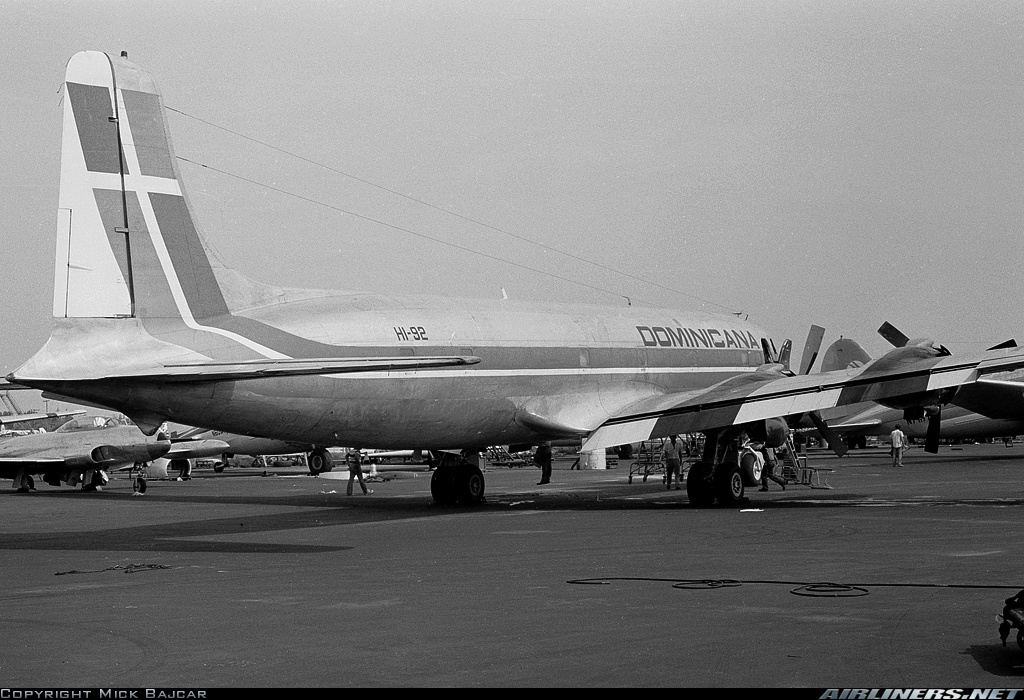

In [5]:
#Test image display
display(Image(filename = comp_df['image_loc'][5467]))

In [6]:
#Save dataframe
filename = "comp_df_dataframe.csv"
file_path = os.path.join(txt_dir, filename)

comp_df.to_csv(file_path, index=False)
